# GRIP @ The Sparks Foundation

# Data Science and Business Analytics Intern

### By : Sanskruti Narwade

## Prediction using Decision Tree Algorithm 
Level :- Intermediate

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
print(dir())

['In', 'Out', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i2', '_ih', '_ii', '_iii', '_oh', 'exit', 'get_ipython', 'np', 'os', 'pd', 'plt', 'quit', 'sns', 'warnings']


In [3]:
print(os.getcwd)

<built-in function getcwd>


In [4]:
df = pd.read_csv(r'C:\Users\sameer narwade\Desktop\Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.drop('Id',axis=1,inplace=True)

In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
df.shape

(150, 5)

In [9]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# EDA

G:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


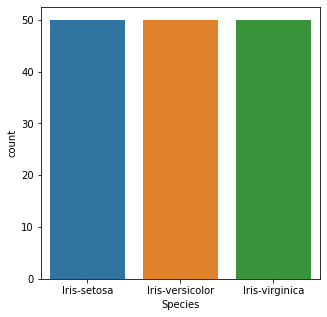

In [10]:
plt.figure(figsize=(5,5))
sns.countplot('Species',data=df)
plt.show()

In [11]:
def scatter(col1,col2):
    plt.figure(figsize=(6,5))
    sns.scatterplot(x=col1,y=col2,hue='Species',data=df)
    plt.title('{} VS {}'.format(col1,col2))
    plt.show()

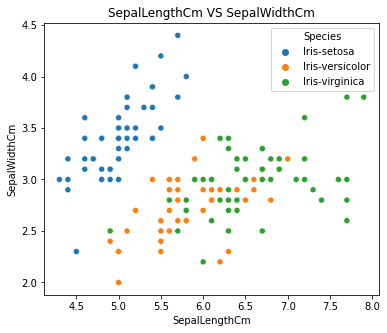

In [12]:
scatter('SepalLengthCm','SepalWidthCm')

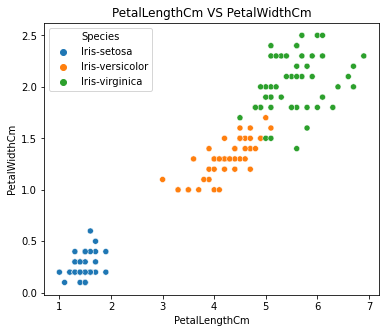

In [13]:
scatter('PetalLengthCm','PetalWidthCm')

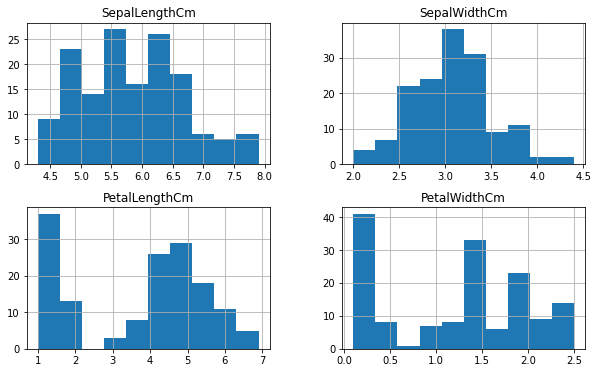

In [14]:
df.hist()
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

<AxesSubplot:>

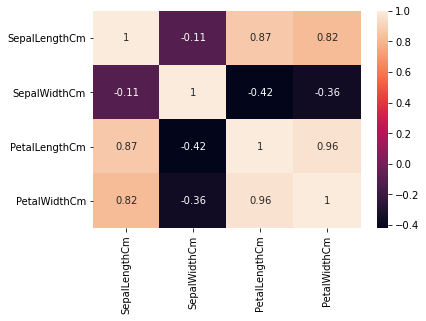

In [15]:
sns.heatmap(df.corr(),annot=True)

# Label Encoding Method

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()

In [18]:
df['Species']=le.fit_transform(df['Species'])

In [19]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [20]:
X = df.drop('Species',axis=1)
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
Y = df['Species']

# Splitting the Dataset into Training Set and Test Set

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtc = DecisionTreeClassifier()

In [26]:
dtc.fit(X_train,Y_train)
Y_pred = dtc.predict(X_test)

In [27]:
dtc.score(X_train,Y_train)

1.0

# Predicting the Test Set result

[[13  0  0]
 [ 0 11  1]
 [ 0  2 11]]
0.9210526315789473
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.85      0.92      0.88        12
           2       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



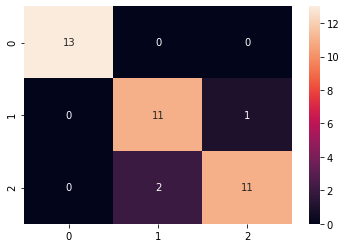

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm= confusion_matrix(Y_test, Y_pred)
print(cm)
sns.heatmap(cm, annot=True)
print(accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

In [29]:
from sklearn.model_selection import cross_val_score

In [30]:
cross_val_score(DecisionTreeClassifier(),X_test,Y_test)

array([1., 1., 1., 1., 1.])

[Text(133.92000000000002, 195.696, 'X[3] <= 0.8\ngini = 0.667\nsamples = 112\nvalue = [37, 38, 37]'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(167.40000000000003, 152.208, 'X[2] <= 4.95\ngini = 0.5\nsamples = 75\nvalue = [0, 38, 37]'),
 Text(66.96000000000001, 108.72, 'X[3] <= 1.65\ngini = 0.097\nsamples = 39\nvalue = [0, 37, 2]'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(100.44000000000001, 65.232, 'X[1] <= 2.95\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 108.72, 'X[2] <= 5.05\ngini = 0.054\nsamples = 36\nvalue = [0, 1, 35]'),
 Text(234.36, 65.232, 'X[0] <= 6.5\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(200.88000000000002, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(267.84

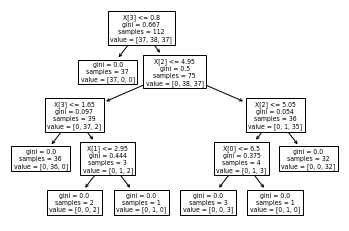

In [31]:
from sklearn import tree
tree.plot_tree(dtc)